In [21]:
from os import listdir
from os.path import isfile, join
import json
import pandas as pd
import datetime
import seaborn as sns
sns.set(rc={'figure.figsize':(13, 6)})

In [2]:
mypath = "../data/revisions/"
file = "rev_kash_ur_21-10-2019 12-30-37.json"

with open(mypath + file) as thefile:
        data = json.load(thefile)
        df = pd.DataFrame(data)

In [3]:
df['timestamp'] = df['timestamp'].astype(str)
df.timestamp=df.timestamp.str.replace("T"," ")
df.timestamp=df.timestamp.str.replace("Z","")
# df.to_csv(r'kash_hi.csv')
print(df[:3])

           user  anon            timestamp  size  \
0  103.255.6.68  True  2019-09-01 06:05:52  7199   
1     امین اکبر   NaN  2019-08-22 12:42:15  7196   
2   103.7.77.73  True  2019-08-14 12:02:55  7056   

                                               slots  \
0  {'main': {'contentmodel': 'wikitext', 'content...   
1  {'main': {'contentmodel': 'wikitext', 'content...   
2  {'main': {'contentmodel': 'wikitext', 'content...   

                                             comment  
0  /* مئلہ کشمیر پر اقوام متحدہ کی ثالثی */ Fixed...  
1                                                     
2                          1971 کی جنگ کا زکر نہ تھا  


In [4]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['size'] = pd.to_numeric(df['size'])
df.dtypes
df = df.set_index('timestamp')

In [5]:
# df = df.set_index('timestamp')
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.weekday_name
df.dtypes
df.head(3)

,user,anon,size,slots,comment,year,month,day
timestamp,,,,,,,,
2019-09-01 06:05:52,103.255.6.68,True,7199,"{'main': {'contentmodel': 'wikitext', 'content...",/* مئلہ کشمیر پر اقوام متحدہ کی ثالثی */ Fixed...,2019,9,Sunday
2019-08-22 12:42:15,امین اکبر,NaN,7196,"{'main': {'contentmodel': 'wikitext', 'content...",,2019,8,Thursday
2019-08-14 12:02:55,103.7.77.73,True,7056,"{'main': {'contentmodel': 'wikitext', 'content...",1971 کی جنگ کا زکر نہ تھا,2019,8,Wednesday


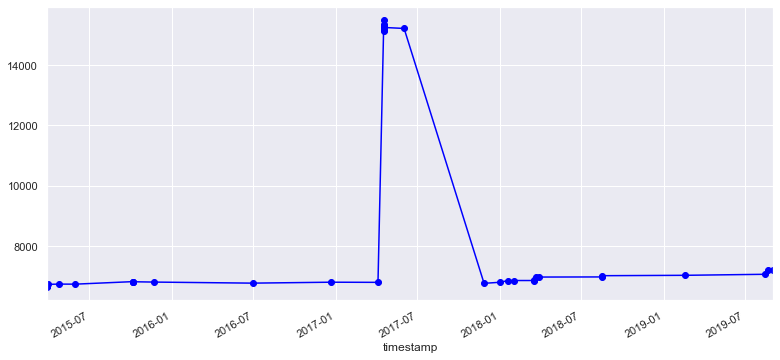

In [22]:
df['size'].plot(marker='o', linestyle='-', linewidth=1.5, color = 'blue')

In [20]:
# df = df.drop(['user', 'anon', 'slots','comment'], axis=1)
df.dtypes
df.to_csv(r'kash_ur.csv')